In [1]:
#importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [2]:
#reading in the data, including all features extracted + Participant Number + Task_Label + Classification
#Task Labels refer to the conditions in the lab, and the classification is either 0 (no speech) or 1 (speech)
df = pd.read_excel('hexoskin_2bands_training_set.xlsx')
df

,Task_Label,insp_dur_mean,insp_dur_sd,exp_dur_mean,exp_dur_sd,insp_amp_mean,insp_amp_sd,exp_amp_mean,exp_amp_sd,insp_flow_mean,...,A_ie_ratio_sd,A_duty_cycle_mean,A_exp_diff_mean,A_RSP_Symmetry_PeakTrough,A_RRV_RMSSD,A_RSP_Rate_Mean,A_insp_minu_depth,A_exp_minu_depth,Participant,Classification
0,12.0a,1.651476,0.202622,1.683594,0.156604,2.838371e+07,5.297158e+06,2.801132e+07,5.304442e+06,1.705501e+07,...,0.062486,0.492399,0.117188,0.533339,404.771735,17.878791,2.575890e+08,2.546476e+08,10785,0
1,12.0b,1.641059,0.087626,1.749512,0.152211,3.007262e+07,2.361021e+06,3.051898e+07,2.676608e+06,1.832396e+07,...,0.067763,0.485336,0.241071,0.548618,392.384431,17.546989,2.479886e+08,2.488577e+08,10785,0
2,12.0c,2.121652,0.213602,2.283203,0.213642,4.145074e+07,3.910462e+06,4.186500e+07,3.564286e+06,1.963778e+07,...,0.075026,0.482721,0.236719,0.546523,459.428807,14.230616,2.363309e+08,2.374245e+08,10785,0
3,12.0d,1.778460,0.094830,1.953683,0.213173,3.375909e+07,2.710758e+06,3.373187e+07,2.535948e+06,1.899324e+07,...,0.077733,0.484587,0.266276,0.560049,450.569753,15.670392,1.874460e+08,1.881041e+08,10785,0
4,12.0e,2.011161,0.243663,2.149088,0.213828,3.628928e+07,3.059318e+06,3.653598e+07,3.092634e+06,1.814004e+07,...,0.123937,0.488034,0.108073,0.550851,516.192869,14.472383,2.053623e+08,2.026534e+08,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,85,1.446875,0.122088,1.498828,0.200555,3.969908e+07,5.263487e+06,3.972936e+07,7.984288e+06,2.738841e+07,...,0.102701,0.488741,0.218316,0.497411,357.971103,20.427800,4.945668e+08,4.951134e+08,98586,0
2900,87,1.373264,0.823189,1.939236,0.725393,2.686951e+07,2.472549e+07,2.643146e+07,1.682432e+07,1.682912e+07,...,0.814501,0.431877,0.941894,0.503841,1042.040237,18.146565,2.527006e+08,2.459244e+08,98586,1
2901,89,1.421875,0.078178,1.456641,0.117894,3.635269e+07,5.322750e+06,3.546101e+07,5.857152e+06,2.550938e+07,...,0.059908,0.494804,0.101562,0.508568,153.331025,21.143144,5.579287e+08,5.531828e+08,98586,0
2902,91,1.755208,0.529109,2.785156,1.447558,4.342708e+07,1.907822e+07,4.094893e+07,1.914789e+07,2.724807e+07,...,0.272736,0.360902,1.260045,0.468808,2387.940073,16.206537,2.963515e+08,2.799627e+08,98586,1


In [6]:
# checking if there are NaN values in any column and if so, printing the associated Participant & Task_Label
for index, row in df.iterrows():
    if row.isnull().any():
        print(f"NaN value found in row {index}:")
        print(f"Participant: {row['Participant']}, Task_Label: {row['Task_Label']}")
        print(row)


NaN value found in row 1087:
Participant: 34023, Task_Label: 28.0b
Task_Label                              28.0b
insp_dur_mean                         1.46582
insp_dur_sd                          0.073463
exp_dur_mean                         6.691406
exp_dur_sd                           1.019828
insp_amp_mean                 86006628.652867
insp_amp_sd                   15737862.747232
exp_amp_mean                  82767385.185434
exp_amp_sd                     2758546.113743
insp_flow_mean                58578981.379221
insp_flow_sd                   10027484.32151
exp_flow_mean                  12627856.22605
exp_flow_sd                    1713557.918358
ie_ratio_mean                        0.221789
ie_ratio_sd                          0.038857
duty_cycle_mean                      0.180717
exp_diff_mean                        1.193359
RSP_Symmetry_PeakTrough                   NaN
RRV_RMSSD                         1322.717046
RSP_Rate_Mean                        7.438991
insp_minu_dep

In [7]:
from sklearn.impute import SimpleImputer
#needed imputations (for the missing neurokit2 values) were already done while preprocessing
#one feature of one segment from a participant was missed, here we just fill that in with SimpleImputer
participant_id = 34023

# filter DataFrame to include only rows belonging to the same participant
participant_df = df[df['Participant'] == participant_id]

# select only the column "RSP_Symmetry_PeakTrough" for imputation
column_name = "RSP_Symmetry_PeakTrough"

# initialize SimpleImputer with strategy = mean
imputer = SimpleImputer(strategy='mean')

# transform the specific column for the participant
participant_column_imputed = imputer.fit_transform(participant_df[[column_name]])

# change the original dataframe with the imputed values for the specific column
df.loc[participant_df.index, column_name] = participant_column_imputed

# verifying NaNs are filled with mean values within the participant for the column (RSP_Symmetry_PeakTrough)
print("NaN values after imputation:")
print(df[df['Participant'] == participant_id][column_name].isnull().sum())


NaN values after imputation:
0


              Feature  Mutual_Information
15      exp_diff_mean            0.299615
24       A_exp_dur_sd            0.293351
36    A_exp_diff_mean            0.290627
3          exp_dur_sd            0.287492
14    duty_cycle_mean            0.282058
38        A_RRV_RMSSD            0.255246
17          RRV_RMSSD            0.253531
12      ie_ratio_mean            0.200306
35  A_duty_cycle_mean            0.196699
9        insp_flow_sd            0.190086


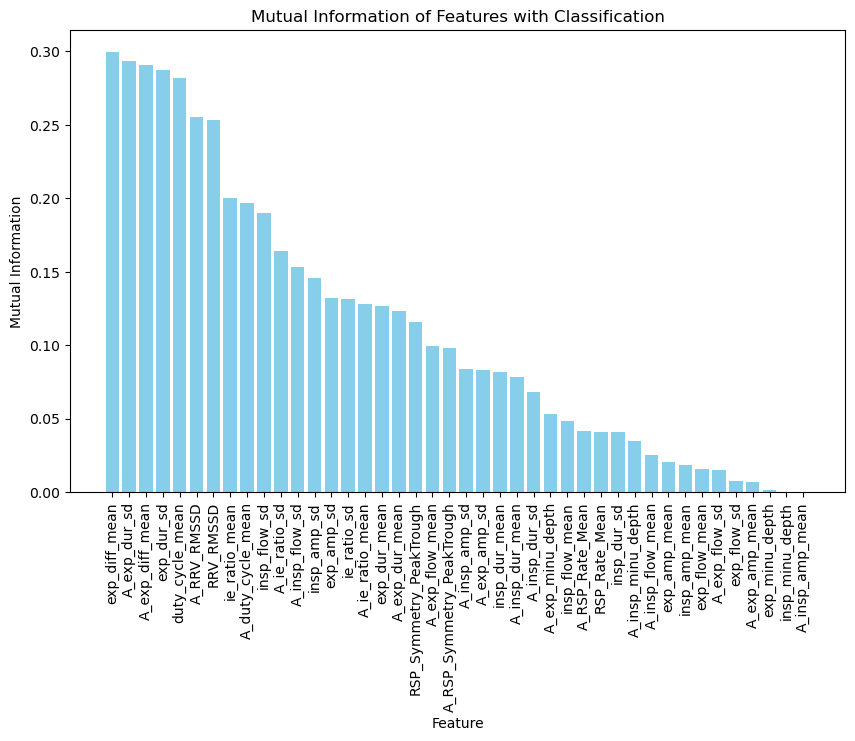

   exp_diff_mean  A_exp_dur_sd  A_exp_diff_mean  exp_dur_sd  duty_cycle_mean  \
0       0.127790      0.164364         0.117188    0.156604         0.492097   
1       0.201451      0.174588         0.241071    0.152211         0.486992   
2       0.199219      0.251690         0.236719    0.213642         0.476697   
3       0.285156      0.197705         0.266276    0.213173         0.477750   
4       0.159375      0.193377         0.108073    0.213828         0.481671   

   A_RRV_RMSSD   RRV_RMSSD  ie_ratio_mean  A_duty_cycle_mean  insp_flow_sd  \
0   404.771735  376.386712       0.971761           0.492399  1.445912e+06   
1   392.384431  351.137516       0.950939           0.485336  1.034691e+06   
2   459.428807  457.608476       0.913378           0.482721  1.890795e+06   
3   450.569753  439.827676       0.918119           0.484587  1.316481e+06   
4   516.192869  457.645154       0.936229           0.488034  9.634884e+05   

  Task_Label  Participant  Classification  
0     

In [8]:
#identifying and plotting the 10 features that have the highest mutual information with the Classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# dropping Participant and Classification columns
df_features = df.drop(columns=['Participant', 'Classification', 'Task_Label'])

A = df_features #defining the features to test
b = df['Classification'] #defining the target

# calculating mutual information
mutual_info = mutual_info_classif(A, b)

# making a dataframe to store feature names along with their mutual information statistic
feature_mi_df = pd.DataFrame({'Feature': A.columns, 'Mutual_Information': mutual_info})

# sort features by mutual information in descending order
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

# print the top 10 features
print(feature_mi_df.head(10))

# plot a histogram of the mutual information
plt.figure(figsize=(10, 6))
plt.bar(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features with Classification')
plt.xticks(rotation=90)
plt.show()

# putting the top 10 features into a new variable
top_features = feature_mi_df['Feature'][:10].tolist()

# defining the columns to keep (we add the task_label, participant, classification as they will be used
#in the nested cross-validation)
columns_to_keep = top_features + ['Task_Label', 'Participant', 'Classification']

# filtering the dataframe to only keep the columns we want
df = df[columns_to_keep]

# Print the filtered DataFrame
print(df.head())


In [9]:
writer = pd.ExcelWriter('hexoskin_2bands_training_set_10_final.xlsx', engine = 'xlsxwriter')

df.to_excel(writer, index = False, float_format = '%.7f', sheet_name = 'Sheet1')

writer.save()

/var/folders/hp/bbc0951x6v16lx1z1dcbzqtm0000gn/T/ipykernel_50748/2481909881.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
